<a href="https://colab.research.google.com/github/Awangnugrawan/Machine-Learning/blob/main/Pertemuan_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE LINEAR REGRESSION**

In [ ]:
import pandas as pd
df1= pd.read_csv('bensin.csv')
df1

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0
...,...,...
60,31,203.0
61,37,241.0
62,23,142.0
63,36,241.0


In [ ]:
df1.describe()


,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


Memisahkan training data dan testing data

In [ ]:
import numpy as np
import sklearn.model_selection as ms

liter = df1[['Liter']]
kilometer= df1[['Kilometer']]

X_train,X_test,y_train,y_test= ms.train_test_split(liter, kilometer, test_size=0.3, random_state=0)
print(X_train.size,   X_test.size)


45 20


visualisasi data

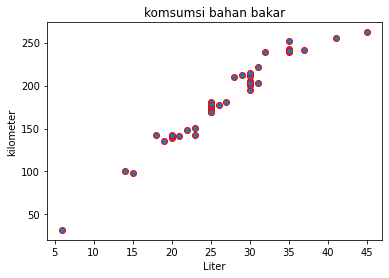

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, edgecolors='r')
plt.xlabel ('Liter')
plt.ylabel ('kilometer')
plt.title( 'komsumsi bahan bakar')
plt.show()

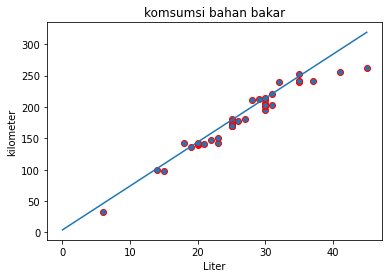

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, edgecolors='r')
plt.xlabel ('Liter')
plt.ylabel ('kilometer')
plt.title( 'komsumsi bahan bakar')
x1= np.linspace(0,45)
y1= 4+7*x1
plt.plot(x1,y1)
plt.show()

Melatih model

In [ ]:
import sklearn.linear_model as lm

In [ ]:
model1=lm.LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

Nilai slop/ gradien ( b)


In [ ]:
model1.coef_

array([[6.34725396]])

Nilai intercept (a)

In [ ]:
model1.intercept_

array([13.41149374])

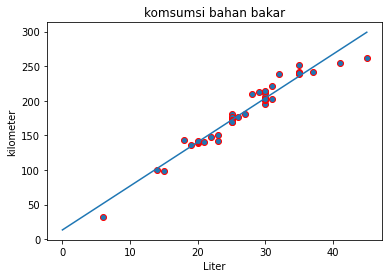

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, edgecolors='r')
plt.xlabel ('Liter')
plt.ylabel ('kilometer')
plt.title( 'komsumsi bahan bakar')
x1= np.linspace(0,45)
y1= 13.41149374+6.347253961*x1
plt.plot(x1,y1)
plt.show()

R.squared menentukan seberapa dekat suatu data dengan garis lurus
R-squared= 1-(RSS/TSS)

RSS= residual sum of squares( menjumlahkan kuadrat dari semua residual)


TSS= Total sum of squares( menjumlahkan kuadrat dari selisih angka predikisi dengan angka rata2

Scoring Model

In [ ]:
r2=model1.score(X_test, y_test)
print(r2)

0.9801544087570965


Angka r2 mendekati 1 , artinya model cukup bagus

In [ ]:
jarak= model1.predict([[60]])
print(jarak)

[[394.24673124]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
prediksi= model1.predict(X_test)
print(prediksi)
print(y_test)

[[108.62030312]
 [172.0928427 ]
 [172.0928427 ]
 [159.39833478]
 [140.35657291]
 [267.30165207]
 [203.82911249]
 [235.56538228]
 [ 76.88403332]
 [241.91263624]
 [172.0928427 ]
 [140.35657291]
 [191.13460457]
 [172.0928427 ]
 [222.87087437]
 [267.30165207]
 [172.0928427 ]
 [108.62030312]
 [165.74558874]
 [121.31481103]]
    Kilometer
45      102.0
29      167.0
43      177.0
62      142.0
34      144.0
33      278.0
31      211.0
40      241.0
26       65.0
63      241.0
22      166.2
2       144.0
11      180.0
28      173.0
54      233.0
4       273.0
10      179.0
35      102.0
52      169.0
46      111.0


**Multiple linear regression**

In [ ]:
df2= pd.read_csv('bensin2.csv')
df2

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273
...,...,...,...,...,...,...,...
60,31,3,0,50,3000,30,203
61,37,1,0,50,3000,22,241
62,23,2,10,50,3000,30,142
63,36,2,0,50,3000,20,241


Korelasi antar data


In [ ]:
df2.corr(method='pearson')

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
Liter,1.000000,-0.087997,0.097560,0.109370,0.079470,0.700815
Penumpang,-0.087997,1.000000,0.081542,0.111942,-0.039954,-0.034175
Bagasi,0.097560,0.081542,1.000000,0.082096,-0.049363,-0.023318
Kecepatan,0.109370,0.111942,0.082096,1.000000,-0.009752,0.042819
Suhu,0.079470,-0.039954,-0.049363,-0.009752,1.000000,0.136657
Kilometer,0.700815,-0.034175,-0.023318,0.042819,0.136657,1.000000


Pemodelan

In [ ]:
X= df2[['Liter', 'Penumpang','Suhu','Kecepatan']]
y= df2[['Kilometer']]

X_train,X_test,y_train,y_test= ms.train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.size,   X_test.size)



208 52


In [ ]:
import sklearn.linear_model as lm

In [ ]:
model1=lm.LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [ ]:
print('slope',model1.coef_)

slope [[ 6.47061024  0.89999549  3.56241066 -2.6488371 ]]


In [ ]:
print('intercept',model1.intercept_)

intercept [19.62904872]
